In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from torch.utils.data import DataLoader

# <center>Pré-processamento dos dados</center>

In [2]:
train_path = 'dataset_teste2/train'
test_path = 'dataset_teste2/test'

In [3]:
transform_train = transforms.Compose(
    [transforms.Resize(size = (224,224)),
     transforms.RandomRotation(degrees=15),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

transform_test = transforms.Compose(
    [transforms.Resize(size = (224,224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform = transform_train)
test_dataset = datasets.ImageFolder(test_path, transform = transform_test)

In [5]:
trainloader = DataLoader(train_dataset, batch_size = 28, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 30, shuffle = True)

# <center>Implementação da arquitetura CNN</center>

In [6]:
model = models.densenet121()

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Linear(model.classifier.in_features, 3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo utilizado: {device}")

Dispositivo utilizado: cuda


In [7]:
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [8]:
num_epoch = 250
learning_rate = 0.001

In [9]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [10]:
train_losses = []
train_acc = []

training_start_time = time.time()

for epoch in range(num_epoch):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    _, predicted = torch.max(outputs.data, 1)

    acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
    train_acc.append(acc)

    print(f"Época {epoch + 1}/{num_epoch} - Perda no treinamento: {train_loss:.6f} - Acurácia: {acc:.4f}")

training_time = time.time() - training_start_time
print(f"\nTempo total de treinamento: {training_time:.2f} segundos")

Época 1/250 - Perda no treinamento: 0.979102 - Acurácia: 0.6429
Época 2/250 - Perda no treinamento: 0.794044 - Acurácia: 0.7857
Época 3/250 - Perda no treinamento: 0.705638 - Acurácia: 0.8214
Época 4/250 - Perda no treinamento: 0.666601 - Acurácia: 0.7500
Época 5/250 - Perda no treinamento: 0.612639 - Acurácia: 0.7500
Época 6/250 - Perda no treinamento: 0.597743 - Acurácia: 0.8214
Época 7/250 - Perda no treinamento: 0.606940 - Acurácia: 0.7857
Época 8/250 - Perda no treinamento: 0.583135 - Acurácia: 0.7143
Época 9/250 - Perda no treinamento: 0.571926 - Acurácia: 0.8929
Época 10/250 - Perda no treinamento: 0.540168 - Acurácia: 0.7500
Época 11/250 - Perda no treinamento: 0.537382 - Acurácia: 0.7143
Época 12/250 - Perda no treinamento: 0.525254 - Acurácia: 0.8214
Época 13/250 - Perda no treinamento: 0.527979 - Acurácia: 0.8571
Época 14/250 - Perda no treinamento: 0.530166 - Acurácia: 0.8214
Época 15/250 - Perda no treinamento: 0.533553 - Acurácia: 0.9643
Época 16/250 - Perda no treinament

Text(0.5, 0.98, 'Treinamento')

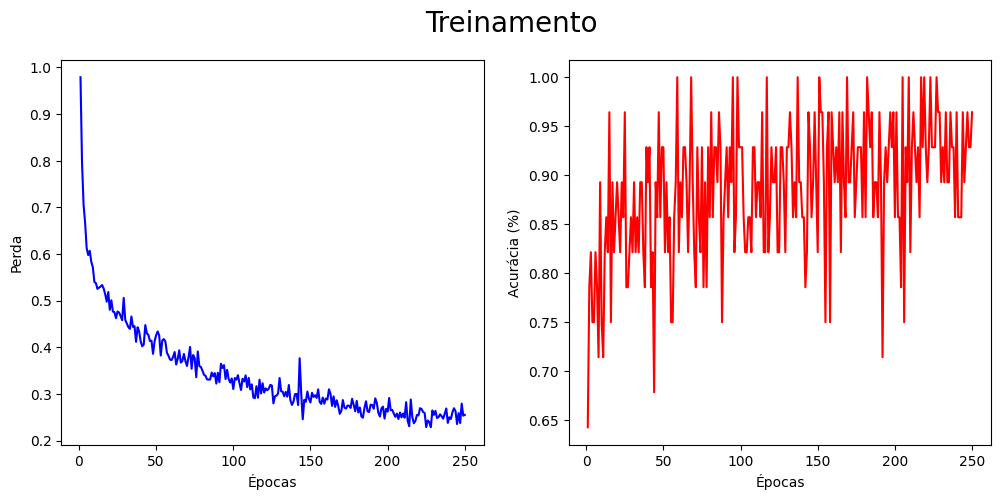

In [11]:
epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r-')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')

plt.suptitle("Treinamento", fontsize = 20)

In [12]:
rot_array = []
predt_array = []

model.eval()
    
with torch.no_grad():
        
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        rot_array.extend(labels.cpu().detach().numpy())
        predt_array.extend(predicted.cpu().detach().numpy())

print("!!!Teste finalizado!!!")

!!!Teste finalizado!!!


# <center>Métricas de avaliação</center>

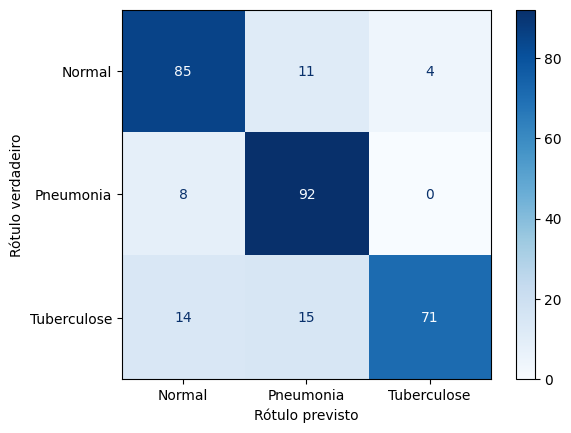

In [13]:
cm = confusion_matrix(rot_array, predt_array)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculose'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

In [14]:
acc = accuracy_score(rot_array, predt_array)
print(f"Acurácia: {acc:.2f}")

Acurácia: 0.83


In [15]:
precision = precision_score(rot_array, predt_array, average='weighted')
print(f"Precisão: {precision:.2f}")

Precisão: 0.84


In [16]:
recall = recall_score(rot_array, predt_array, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.83


In [17]:
f1 = f1_score(rot_array, predt_array, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.83
